In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loans.csv')

# Set client_id as index
df.set_index('client_id', inplace=True)



In [ ]:
# Display the first 5 rows of the dataset
print(df.head())


          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


In [ ]:
# Check the information and data types of each column
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


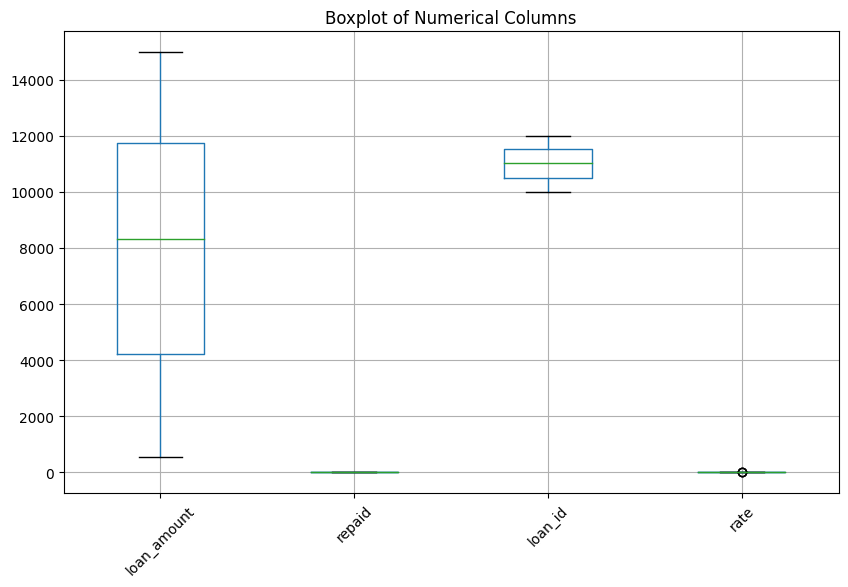

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot for each numerical column in the dataset
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


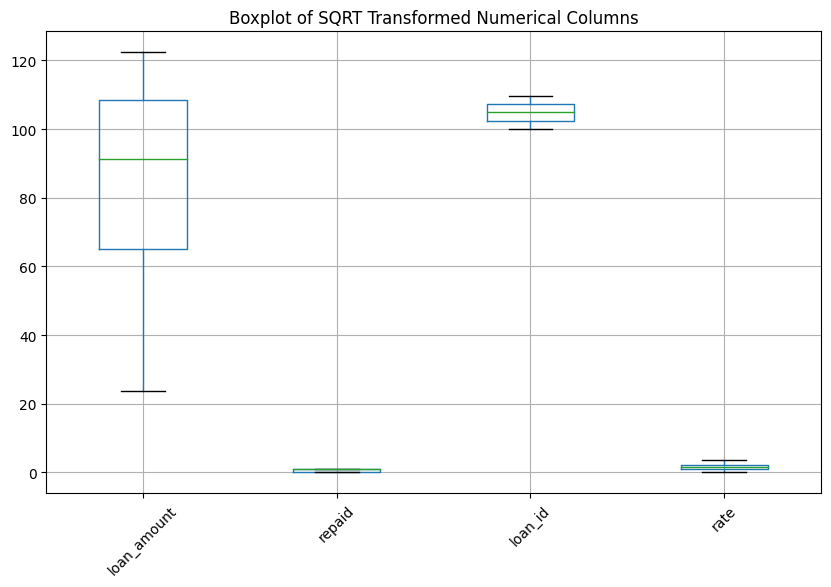

In [ ]:
# Select only the numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Perform SQRT transformation on the numerical columns
df_sqrt_transformed = df[numerical_columns].apply(np.sqrt)

# Visualize the boxplot of the transformed data
plt.figure(figsize=(10, 6))
df_sqrt_transformed.boxplot()
plt.title('Boxplot of SQRT Transformed Numerical Columns')
plt.xticks(rotation=45)
plt.show()



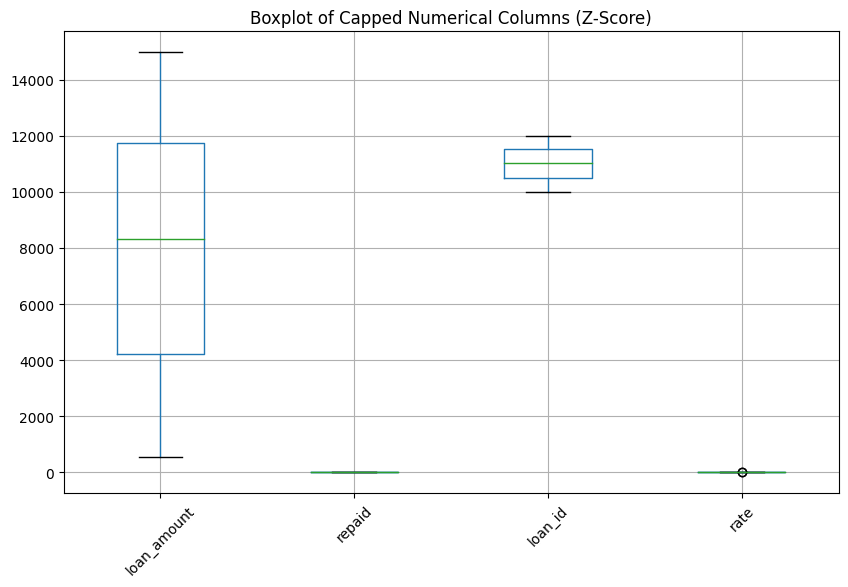

In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate Z-Score for each numerical column
z_scores = df[numerical_columns].apply(zscore)

# Define threshold for Z-Score
z_score_threshold = 3

# Apply capping based on Z-Score
df_capped = df[numerical_columns].mask((z_scores > z_score_threshold) | (z_scores < -z_score_threshold))

# Fill missing values with the median
df_capped.fillna(df[numerical_columns].median(), inplace=True)

# Visualize the boxplot of the capped data
plt.figure(figsize=(10, 6))
df_capped.boxplot()
plt.title('Boxplot of Capped Numerical Columns (Z-Score)')
plt.xticks(rotation=45)
plt.show()


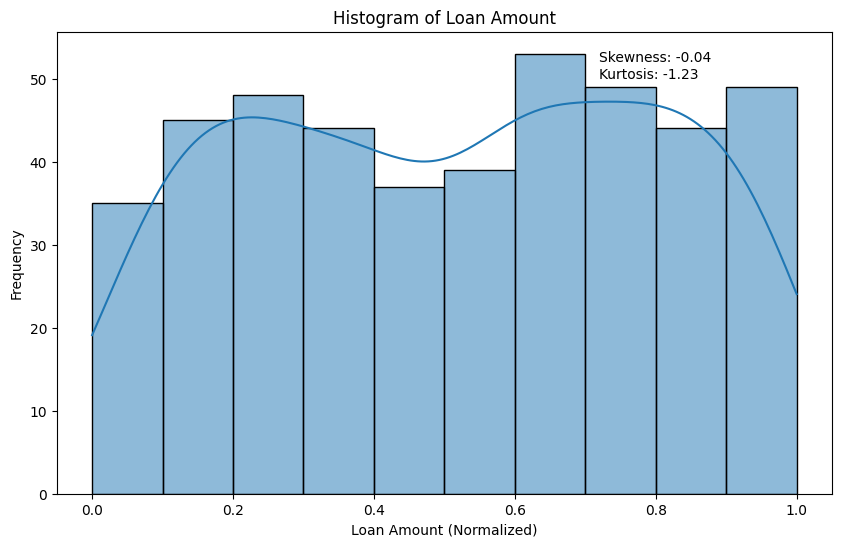

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

# Apply Min-Max Normalization to numerical columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Display skewness and kurtosis graphs for Loan Amount
loan_amount_column = df_scaled['loan_amount']  # Adjust column name to lowercase

# Calculate skewness and kurtosis
skewness = loan_amount_column.skew()
kurtosis = loan_amount_column.kurtosis()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan_amount_column, kde=True)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount (Normalized)')
plt.ylabel('Frequency')

# Add skewness and kurtosis information to the plot
plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes)

plt.show()



In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show the first five rows of the encoded DataFrame
print(df_encoded.head())


           loan_amount  repaid  loan_id  rate  loan_type_credit  \
client_id                                                         
46109            13672       0    10243  2.15                 0   
46109             9794       0    10984  1.25                 1   
46109            12734       1    10990  0.68                 0   
46109            12518       1    10596  1.24                 0   
46109            14049       1    11415  3.13                 1   

           loan_type_home  loan_type_other  loan_start_2000-03-06  \
client_id                                                           
46109                   1                0                      0   
46109                   0                0                      0   
46109                   1                0                      0   
46109                   0                0                      0   
46109                   0                0                      0   

           loan_start_2000-03-08  loan_start_2

In [ ]:
# Convert loan_start and loan_end columns to datetime format
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

# Calculate tenure of the loan
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

# Display the DataFrame with the new derived feature
print(df.head())


          loan_type  loan_amount  repaid  loan_id loan_start   loan_end  rate  \
client_id                                                                       
46109          home        13672       0    10243 2002-04-16 2003-12-20  2.15   
46109        credit         9794       0    10984 2003-10-21 2005-07-17  1.25   
46109          home        12734       1    10990 2006-02-01 2007-07-05  0.68   
46109          cash        12518       1    10596 2010-12-08 2013-05-05  1.24   
46109        credit        14049       1    11415 2010-07-07 2012-05-21  3.13   

           loan_tenure  
client_id               
46109              613  
46109              635  
46109              519  
46109              879  
46109              684  


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('repaid', axis=1)  # Exclude 'repaid' as it might be the target variable
y = df_encoded['repaid']  # Use 'repaid' as the target variable

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (354, 9) (354,)
Test set shape: (89, 9) (89,)
